# **<center>A basics Generative Adversarial Network (GAN) model created to generate new fashion line. The model is trained with the fashion_mnist datasets using Tensorflow Machine Learning Library</center>**

In [ ]:

/L!pip install tensorflow matplotlib tensorflow-datasets ipywidgets

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
# loading the fashion_mnist datasedataadatat by calling the tensorflow dataset api

ds = tfds.load('fashion_mnist', split='train')

In [ ]:
# impimportingimpimportingortingorting the tensorflow datasets api

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [ ]:
# printing the feature names for the dataset

ds.as_numpy_iterator().next().keys()

dict_keys(['image', 'label'])

In [ ]:
ds.as_numpy_iterator().next()['label']

2

# **2. Visualization of Data & Building the Dataset**

In [ ]:
# data transformation

import numpy as np

# setup connection aka iterator

data_iterator = ds.as_numpy_iterator()

# getting data out of the pipline
data_iterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

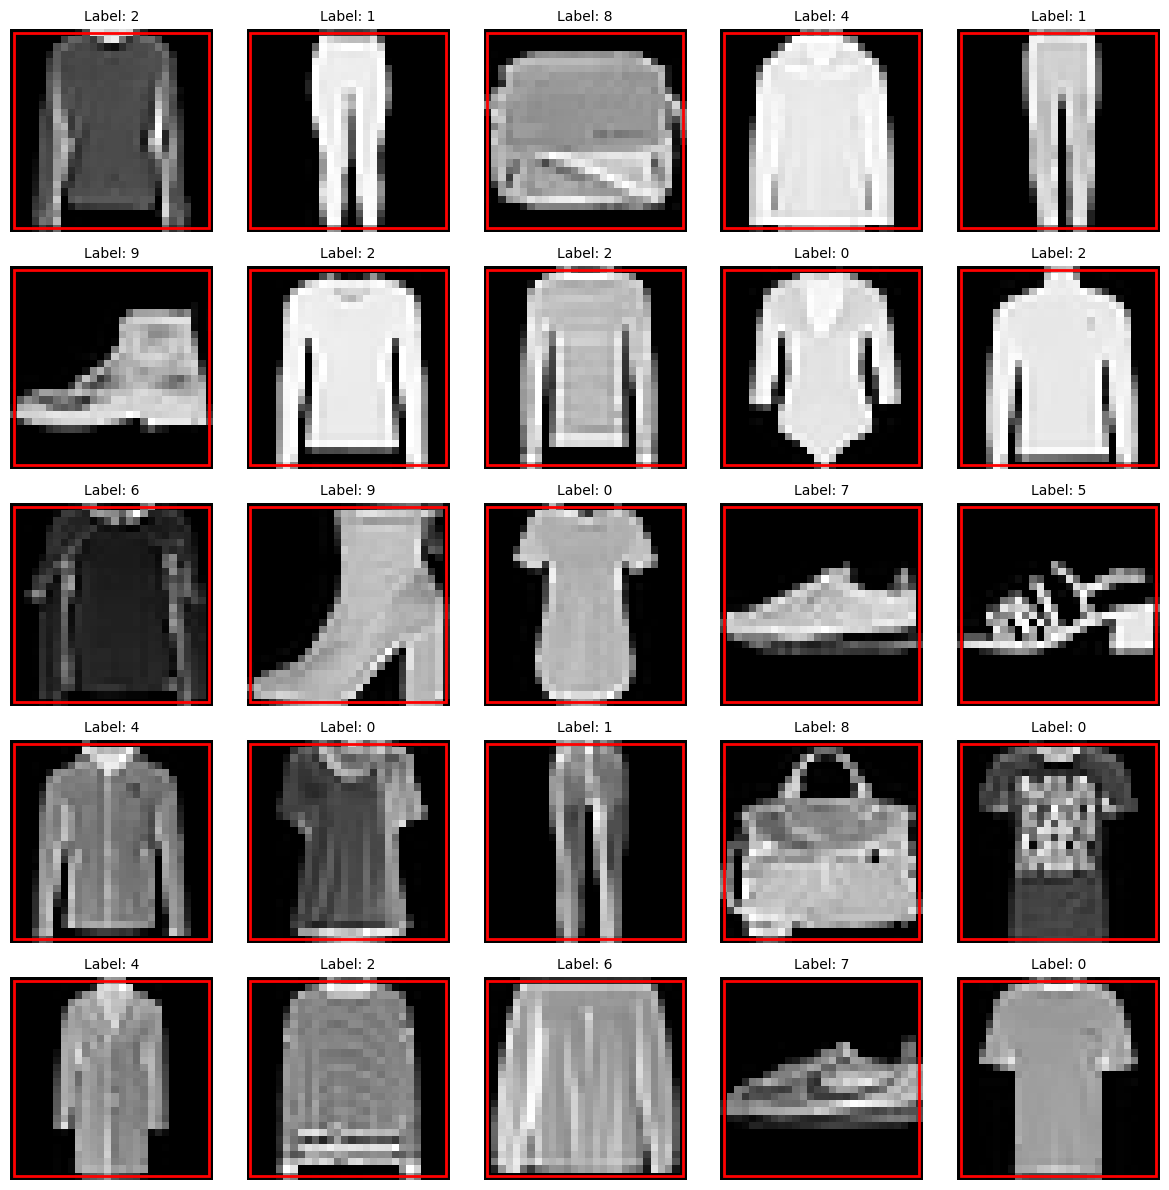

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
ds, info = tfds.load('fashion_mnist', split='train', with_info=True)

# Extract a subset of 10,000 samples from the dataset
num_samples_needed = 25  # Adjust this number to change the grid size
ds_subset = ds.take(num_samples_needed)

# Define grid layout for displaying images
rows = 5
cols = 5

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))

# Iterate over the dataset subset to access and display samples
for i, sample in enumerate(ds_subset):
    image = sample['image']
    label = sample['label']

    # Calculate subplot index (row, col)
    row = i // cols
    col = i % cols

    # Plot image with a bounding box and label
    ax = axes[row, col]
    ax.imshow(image.numpy(), cmap='gray')
    ax.set_title(f'Label: {label.numpy()}', fontsize=10)
    ax.axis('off')
    ax.add_patch(plt.Rectangle((0, 0), 27, 27, linewidth=2, edgecolor='r', facecolor='none'))  # Add red bounding box

# Adjust layout and display the grid of images
plt.tight_layout()
plt.show()


In [ ]:
!pip install tensorflow tensorflow-datasets matplotlib opencv-python




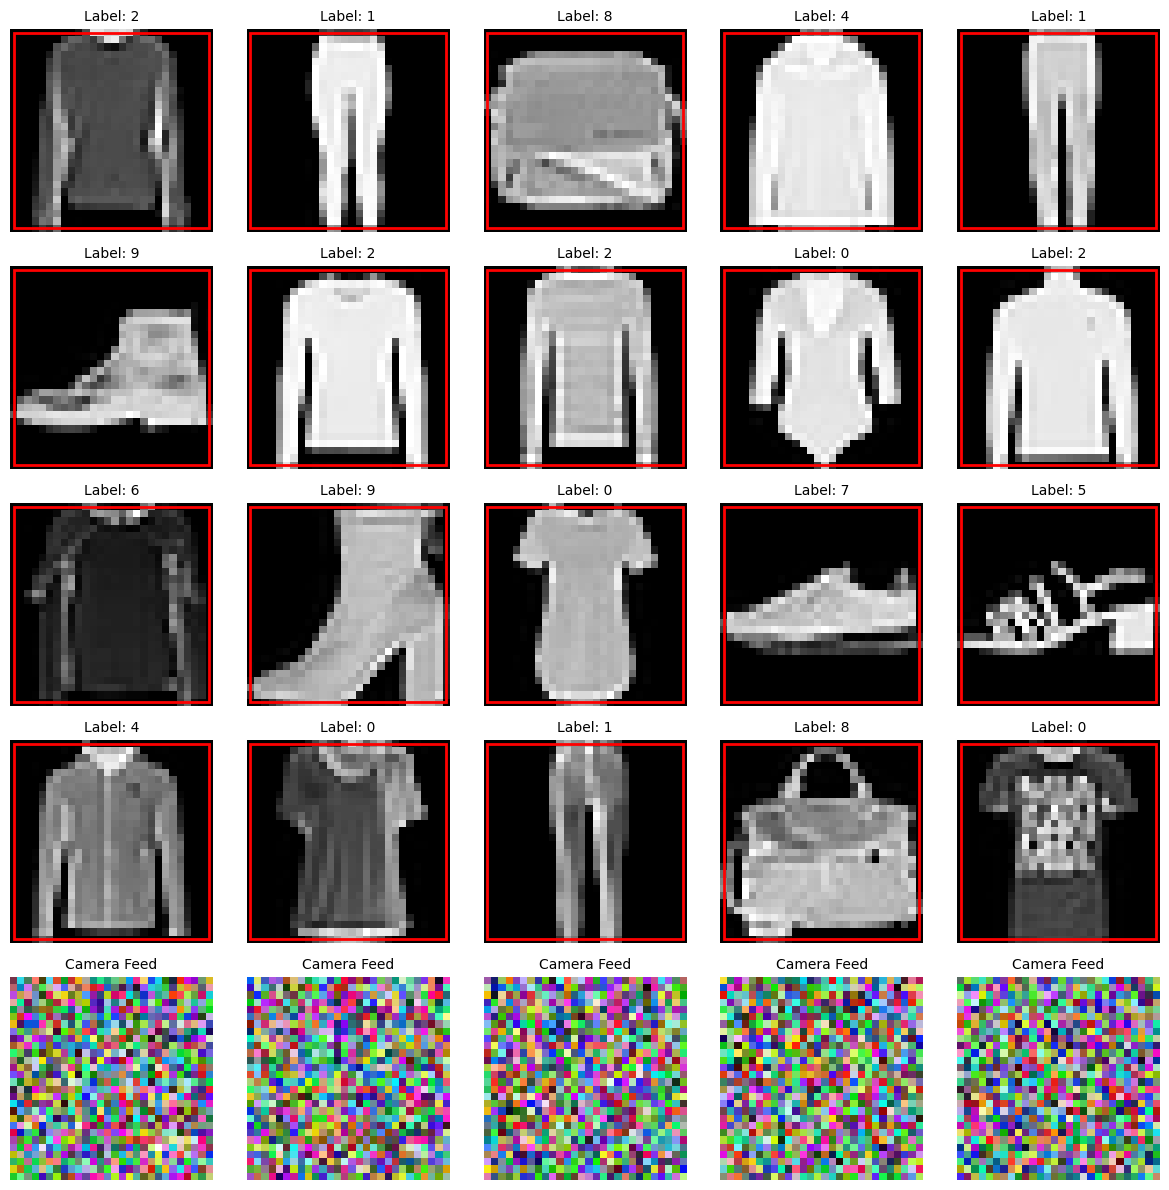

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

# Load Fashion MNIST dataset
ds, info = tfds.load('fashion_mnist', split='train', with_info=True)

# Extract a subset of samples from the dataset
num_samples_needed = 20  # Adjust this number to change the grid size
ds_subset = ds.take(num_samples_needed)

# Define grid layout for displaying images
rows = 5
cols = 5

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))

# Function to simulate getting a camera frame (using random images for simulation)
def get_camera_frame():
    frame = np.random.randint(0, 255, (28, 28, 3), dtype=np.uint8)  # Simulate a random frame
    return frame

# Iterate over the dataset subset to access and display samples
for i, sample in enumerate(ds_subset):
    image = sample['image']
    label = sample['label']

    # Calculate subplot index (row, col)
    row = i // cols
    col = i % cols

    # Plot image with a bounding box and label
    ax = axes[row, col]
    ax.imshow(image.numpy(), cmap='gray')
    ax.set_title(f'Label: {label.numpy()}', fontsize=10)
    ax.axis('off')
    ax.add_patch(plt.Rectangle((0, 0), 27, 27, linewidth=2, edgecolor='r', facecolor='none'))  # Add red bounding box

# Add camera feed to the grid
for i in range(cols):
    frame = get_camera_frame()
    ax = axes[rows - 1, i]  # Place camera feeds in the last row
    ax.imshow(frame)
    ax.set_title('Camera Feed', fontsize=10)
    ax.axis('off')

# Adjust layout and display the grid of images
plt.tight_layout()
plt.show()


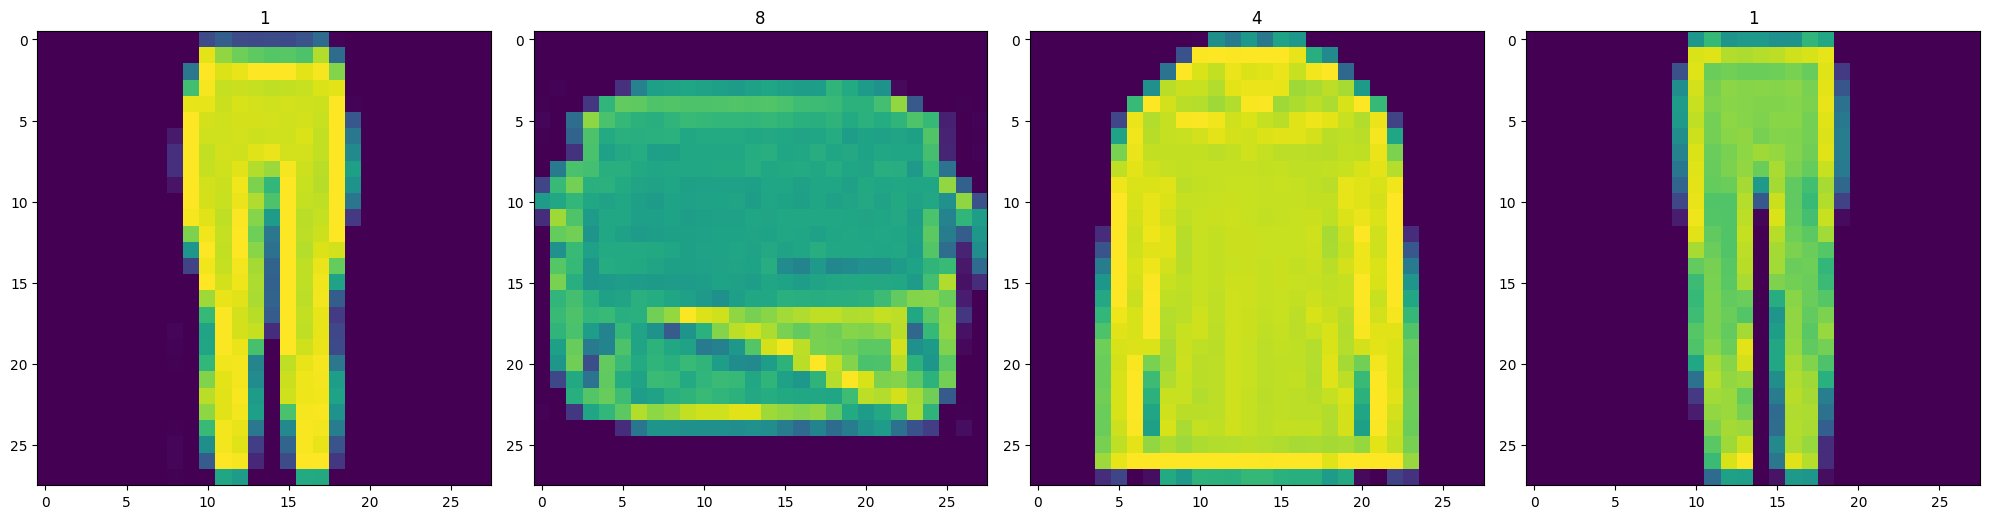

In [ ]:
# import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data_iterator' is your iterator for fetching image batches
# and each batch contains 'image' and 'label' keys

# Create a figure and axes array for subplots
fig, ax = plt.subplots (ncols=4, figsize=(20, 20))

# Loop over four times to display four images
for idx in range(4):
    # Grab an image and label from the data iterator
    batch = next(data_iterator)  # Use next() to fetch the next batch

    # Plot the image on the specific subplot (ax[idx])
    ax[idx].imshow(np.squeeze(batch['image']))  # Display the image
    ax[idx].set_title(batch['label'])  # Set the title as the label

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [ ]:
# Scale and return images only
def scale_images(data):
  image = data['image']
  return image / 255


In [ ]:
# building a tensorflow datapipeline

# reloading the dataset from scratch
ds = tfds.load('fashion_mnist', split='train')
# running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images)
# cache the dataset for that batch
ds = ds.cache()
# shuffle
ds = ds.shuffle(60000)
# batch into 128 images per sample
ds = ds.batch(128)
# step to reduce possible bottlenecking
ds = ds.prefetch(64)

In [ ]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# **3. Building the Neural Network**

####**3.1 Import Modelling Components**

In [ ]:
# importing the Sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
# importing the layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

#### **3.2 Build the Generator Model**

In [ ]:
def build_generator():
  model = Sequential()

  # Takes in random values and reshape it to 7x7x128
  model.add(Dense(7*7*128, input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7, 7, 128)))

  # upsampling block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  # upsampling block 2
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  # Convolutional block 1
  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))

  # Convolutional block 2
  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))

  # Conv layers to end in a single channel
  model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))

  return model

In [ ]:
generator = build_generator()

In [ ]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

1/1 [==============================] - 2s 2s/step


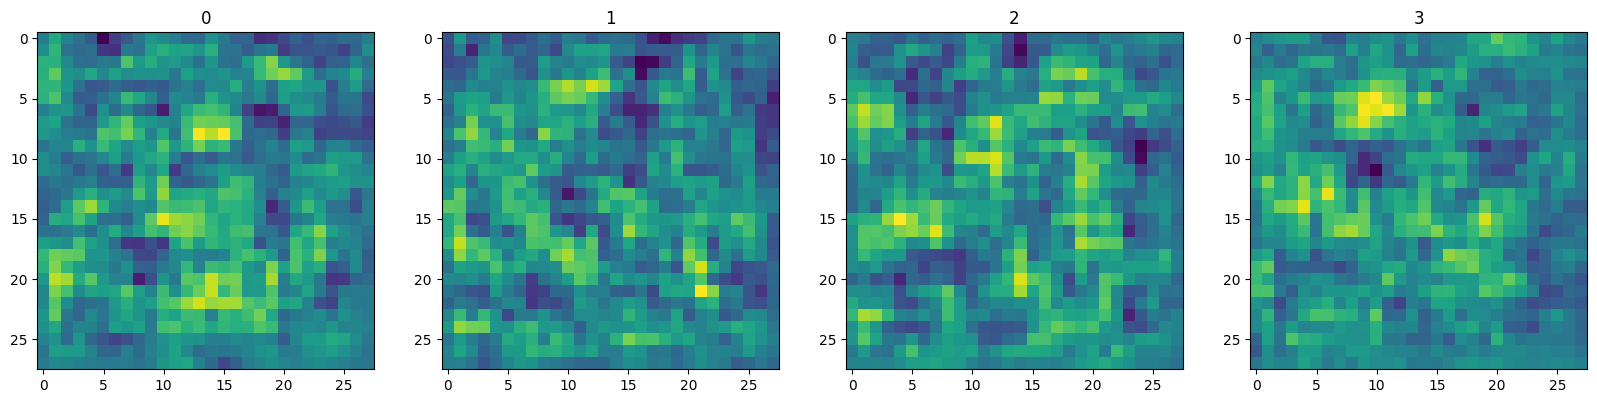

In [ ]:
# Generating images through randomly generated number sample to test the working of the model

img = generator.predict(np.random.randn(4, 128, 1))

# subplot configuration for the images

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# loop through an enumerated images
for idx, image in enumerate(img):

  # plot the image using a specific subplot

  ax[idx].imshow(np.squeeze(image))

  ax[idx].title.set_text(idx)

#### **3.3 Building the Discriminator model**

##### *The Discriminator model is created to classify whether a given image is authentic or generated with GAN we created*

In [ ]:
def build_discriminator():
  model = Sequential()

  # first Covolutional layer
  model.add(Conv2D(32, 5, input_shape = (28, 28, 1)))
  model.add(LeakyReLU(0.2)) # LeakyReLU is more prefered as the activation function for GANs in general.
  model.add(Dropout(0.4)) # Regularization

  # second Convolutional layer
  model.add(Conv2D(64, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # third Convolutional layer
  model.add(Conv2D(128, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # fourth Convolutional layer
  model.add(Conv2D(256, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Flatten then pass to Dense layer

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))

  return model

In [ ]:
discriminator = build_discriminator()

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [ ]:
img = img[0]

In [ ]:
img.shape

(28, 28, 1)

# **4. Constructing Custom Training Loops**

#### **4.1 Setup Losses and Optimizers**

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy


In [ ]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=(0.00001))
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

#### **4.2 Build Subclassed model**

In [ ]:
# importing the base model class to subclass out training step
from tensorflow.keras.models import Model

In [ ]:
class FashionGAN(Model):
  def __init__(self, generator, discriminator, *args, **kwargs):
    super().__init__(*args, **kwargs)

    # create attributes for generator and discriminator

    self.generator = generator
    self.discriminator = discriminator

  def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
    # compile with base class
    super().compile(*args, **kwargs)
    # create attributes for losses and optimizers
    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss


  def train_step(self, batch):
    real_images = batch
    fake_images = self.generator(tf.random.normal((128, 128, 1)), training = False)

    # Train the discriminator
    with tf.GradientTape() as d_tape:
      # Pass the real and fake images to the discriminator model
      yhat_real = self.discriminator(real_images, training=True)
      yhat_fake = self.discriminator(fake_images, training=True)
      yhat_realfake = tf.concat([yhat_real, yhat_fake], axis = 0)

      # create label for real and fake images
      y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

      # add some noise to the TRUE outputs
      noise_real = 0.15 * tf.random.uniform(tf.shape(yhat_real))
      noise_fake = 0.15 * tf.random.uniform(tf.shape(yhat_fake))
      y_realfake += tf.concat([noise_real, noise_fake], axis = 0)

      # calulate loss
      total_d_loss = self.d_loss(y_realfake, yhat_realfake)

    # apply backpropogation - nn learn
    d_grad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(d_grad, self.discriminator.trainable_variables))

    # Train the generator
    with tf.GradientTape() as g_tape:
      # generate some new images
      gen_images = self.generator(tf.random.normal((128, 128, 1)), training=True)

      # create the predicted labels
      predicted_labels = self.discriminator(gen_images, training=False)

      # calculate the loss
      total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

    # apply backpropogation
    g_grad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(g_grad, self.generator.trainable_variables))

    return {"d_loss": total_d_loss, "g_loss": total_g_loss}


In [ ]:
# create a instance of the subclass

f_gan = FashionGAN(generator, discriminator)

In [ ]:
# compile the model

f_gan.compile(g_opt, d_opt, g_loss, d_loss)

#### **4.3 Build Callback**

In [ ]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        super(ModelMonitor, self).__init__()
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim, 1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images = generated_images.numpy()

        fig, ax = plt.subplots(1, self.num_img, figsize=(12, 4))

        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            ax[i].imshow(np.squeeze(img))
            ax[i].set_title(f'Epoch {epoch}, Image {i}')
            ax[i].axis('off')

        plt.show()



#### **4.4 Train**

Epoch 1/20
469/469 [==============================] - ETA: 0s - d_loss: 0.4695 - g_loss: 1.5403

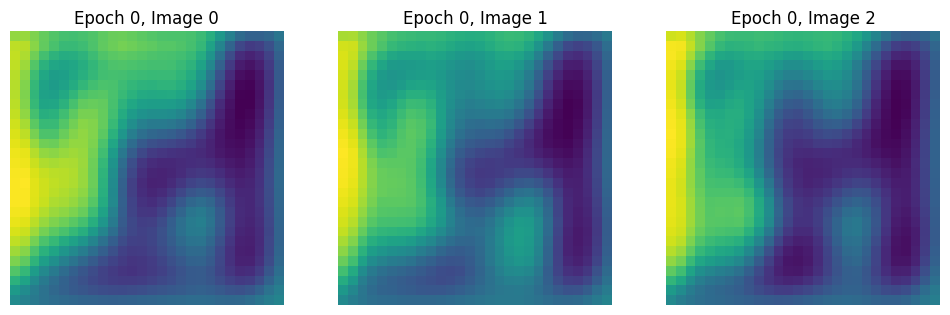

469/469 [==============================] - 91s 166ms/step - d_loss: 0.4692 - g_loss: 1.5418
Epoch 2/20
469/469 [==============================] - ETA: 0s - d_loss: 0.6886 - g_loss: 0.8439

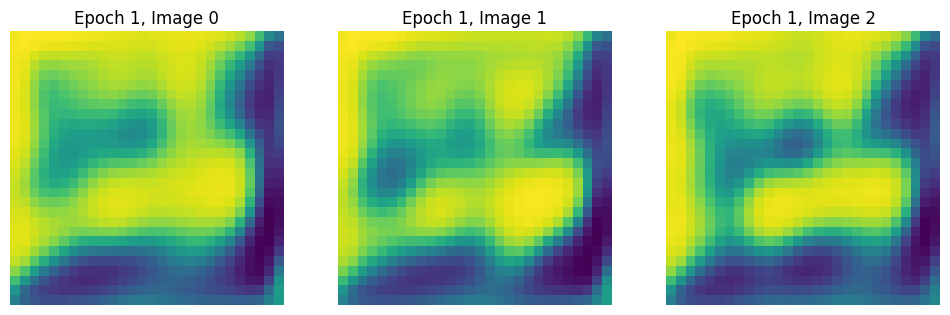

469/469 [==============================] - 79s 169ms/step - d_loss: 0.6884 - g_loss: 0.8441
Epoch 3/20
469/469 [==============================] - ETA: 0s - d_loss: 0.6973 - g_loss: 0.7039

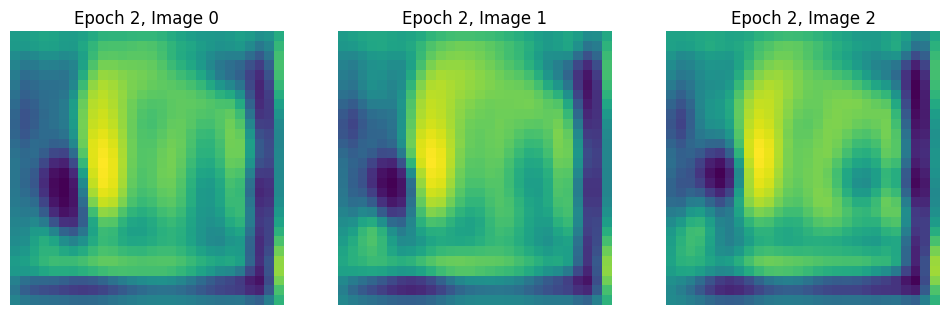

469/469 [==============================] - 80s 170ms/step - d_loss: 0.6972 - g_loss: 0.7040
Epoch 4/20
469/469 [==============================] - ETA: 0s - d_loss: 0.6929 - g_loss: 0.7289

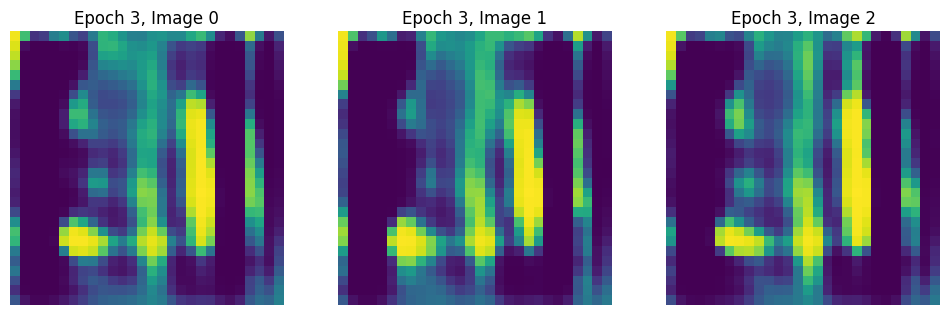

469/469 [==============================] - 79s 169ms/step - d_loss: 0.6929 - g_loss: 0.7288
Epoch 5/20
469/469 [==============================] - ETA: 0s - d_loss: 0.6812 - g_loss: 0.7859

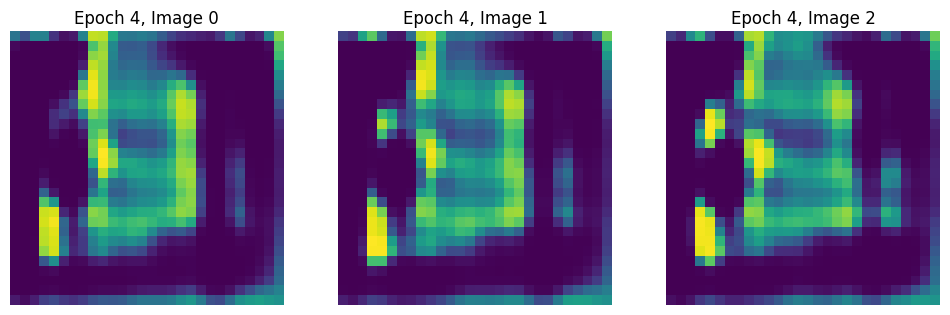

469/469 [==============================] - 80s 170ms/step - d_loss: 0.6812 - g_loss: 0.7857
Epoch 6/20
469/469 [==============================] - ETA: 0s - d_loss: 0.6854 - g_loss: 0.7439

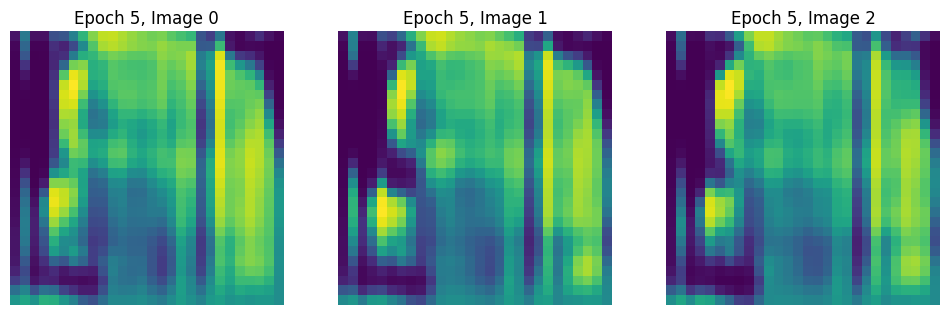

469/469 [==============================] - 80s 170ms/step - d_loss: 0.6854 - g_loss: 0.7439
Epoch 7/20
469/469 [==============================] - ETA: 0s - d_loss: 0.6876 - g_loss: 0.7577

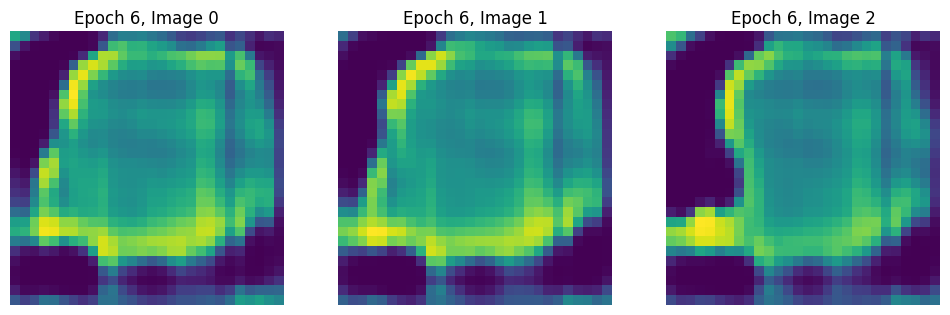

469/469 [==============================] - 80s 169ms/step - d_loss: 0.6875 - g_loss: 0.7577
Epoch 8/20
469/469 [==============================] - ETA: 0s - d_loss: 0.6792 - g_loss: 0.7991

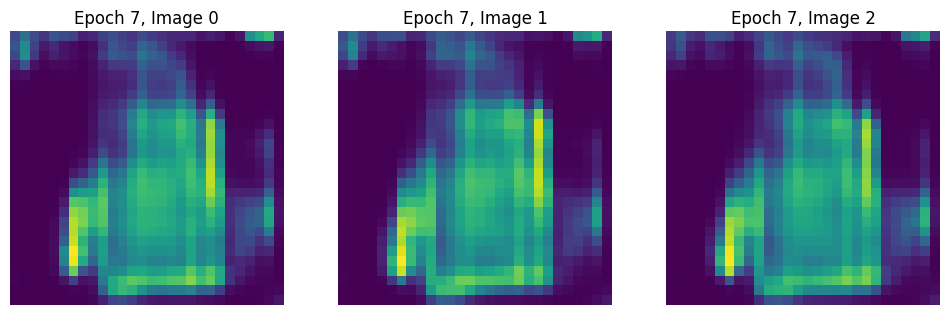

469/469 [==============================] - 79s 169ms/step - d_loss: 0.6793 - g_loss: 0.7989
Epoch 9/20
469/469 [==============================] - ETA: 0s - d_loss: 0.6727 - g_loss: 0.8182

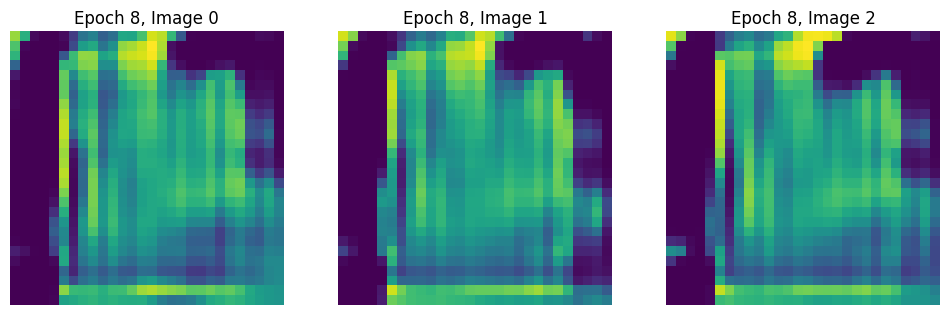

469/469 [==============================] - 80s 170ms/step - d_loss: 0.6728 - g_loss: 0.8180
Epoch 10/20
469/469 [==============================] - ETA: 0s - d_loss: 0.6930 - g_loss: 0.7247

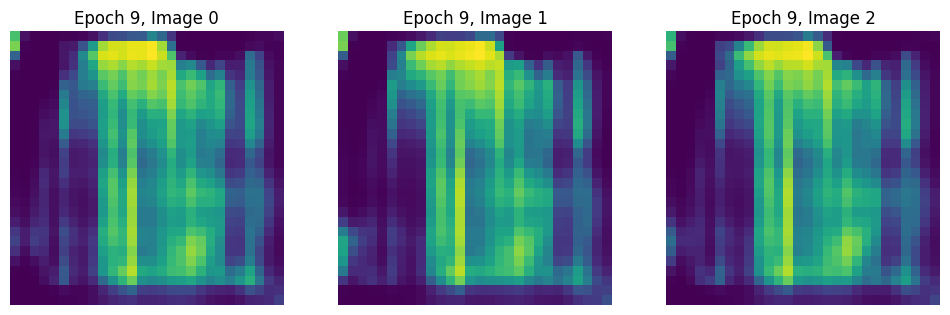

469/469 [==============================] - 79s 169ms/step - d_loss: 0.6929 - g_loss: 0.7247
Epoch 11/20
469/469 [==============================] - ETA: 0s - d_loss: 0.6845 - g_loss: 0.7725

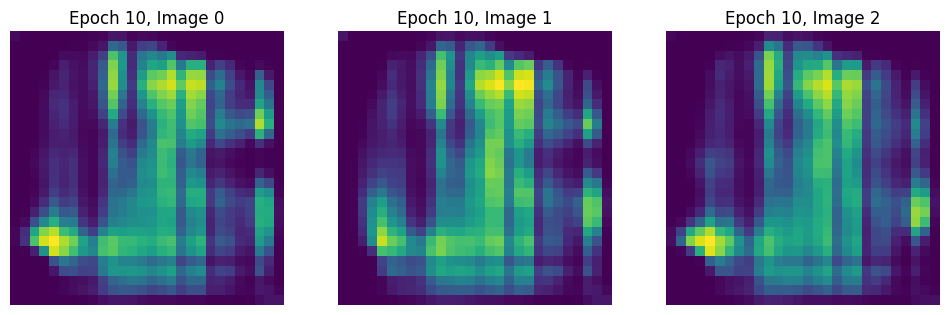

469/469 [==============================] - 79s 169ms/step - d_loss: 0.6845 - g_loss: 0.7725
Epoch 12/20
469/469 [==============================] - ETA: 0s - d_loss: 0.6530 - g_loss: 0.8957

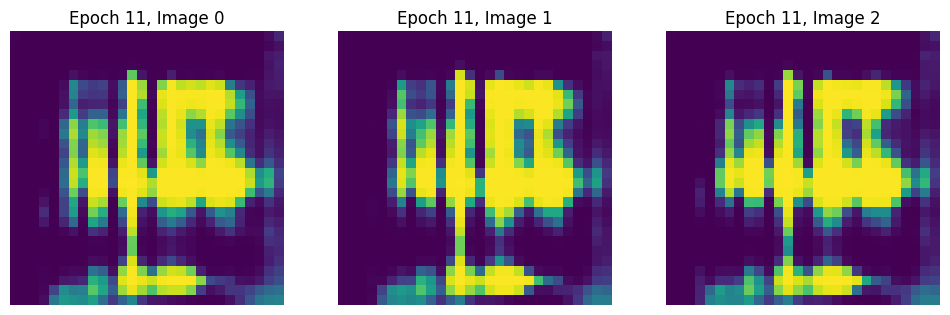

469/469 [==============================] - 79s 169ms/step - d_loss: 0.6527 - g_loss: 0.8958
Epoch 13/20
469/469 [==============================] - ETA: 0s - d_loss: 0.6010 - g_loss: 0.8702

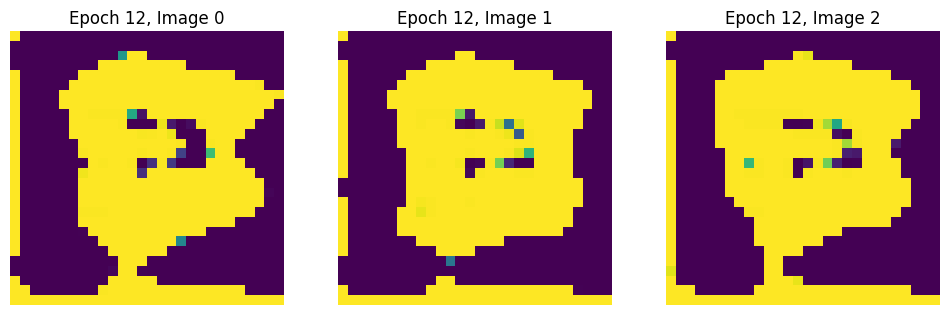

469/469 [==============================] - 79s 169ms/step - d_loss: 0.6007 - g_loss: 0.8697
Epoch 14/20
469/469 [==============================] - ETA: 0s - d_loss: 0.0114 - g_loss: 8.7982

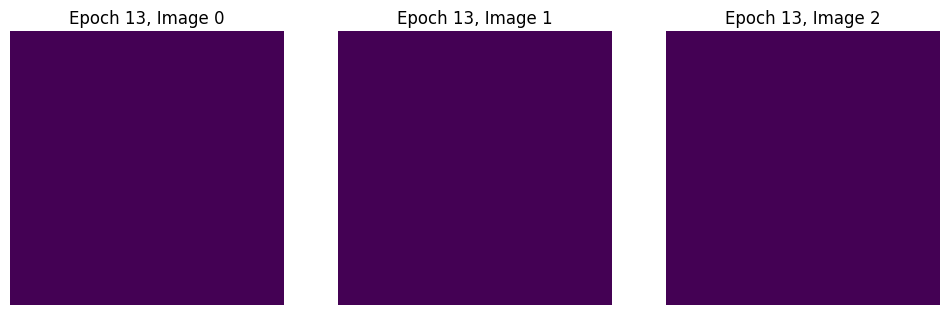

469/469 [==============================] - 78s 165ms/step - d_loss: 0.0102 - g_loss: 8.8164
Epoch 15/20
469/469 [==============================] - ETA: 0s - d_loss: -0.4224 - g_loss: 17.7273

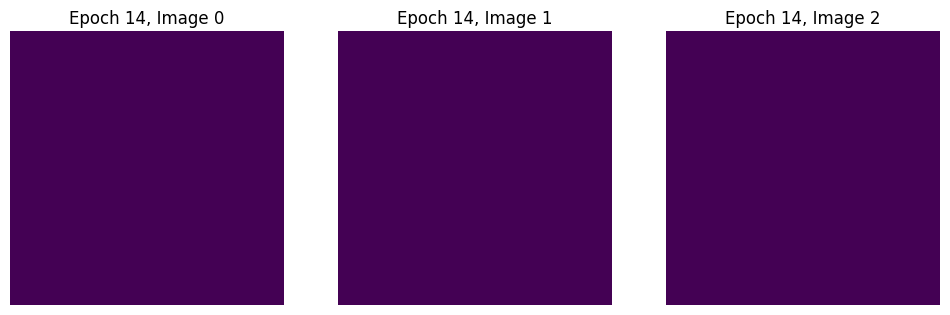

469/469 [==============================] - 77s 163ms/step - d_loss: -0.4226 - g_loss: 17.7281
Epoch 16/20
469/469 [==============================] - ETA: 0s - d_loss: -0.4317 - g_loss: 18.2725

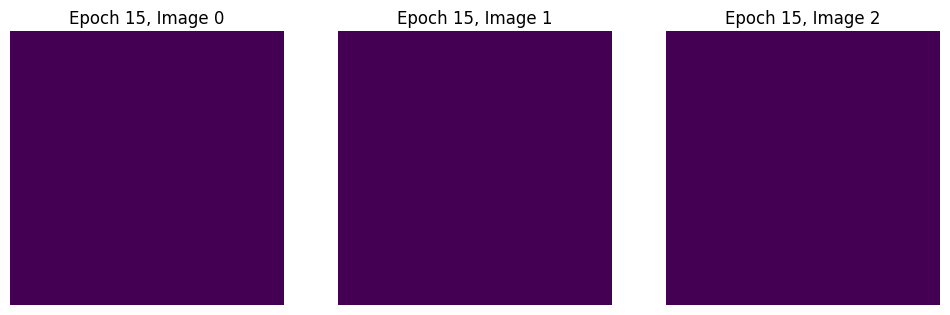

469/469 [==============================] - 77s 163ms/step - d_loss: -0.4319 - g_loss: 18.2733
Epoch 17/20
469/469 [==============================] - ETA: 0s - d_loss: -0.4358 - g_loss: 18.5762

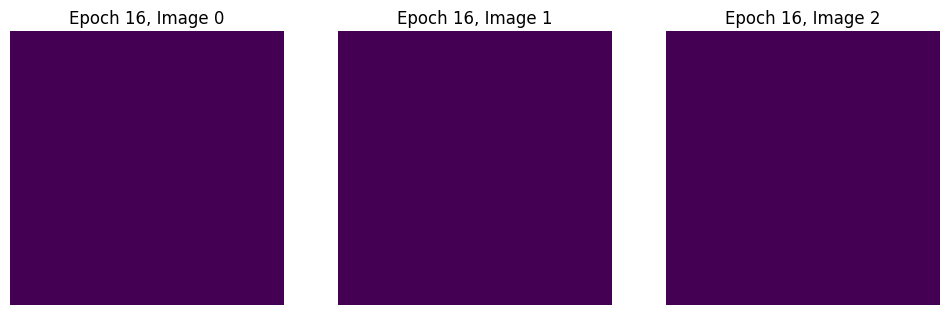

469/469 [==============================] - 76s 163ms/step - d_loss: -0.4360 - g_loss: 18.5766
Epoch 18/20
469/469 [==============================] - ETA: 0s - d_loss: -0.4367 - g_loss: 18.8303

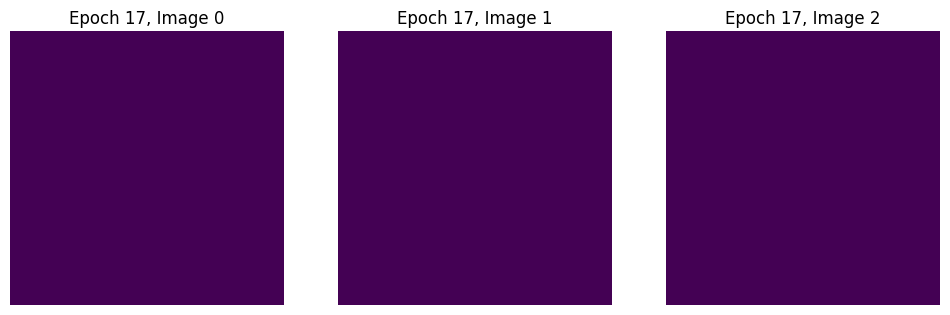

469/469 [==============================] - 76s 163ms/step - d_loss: -0.4369 - g_loss: 18.8307
Epoch 19/20
469/469 [==============================] - ETA: 0s - d_loss: -0.4359 - g_loss: 18.9951

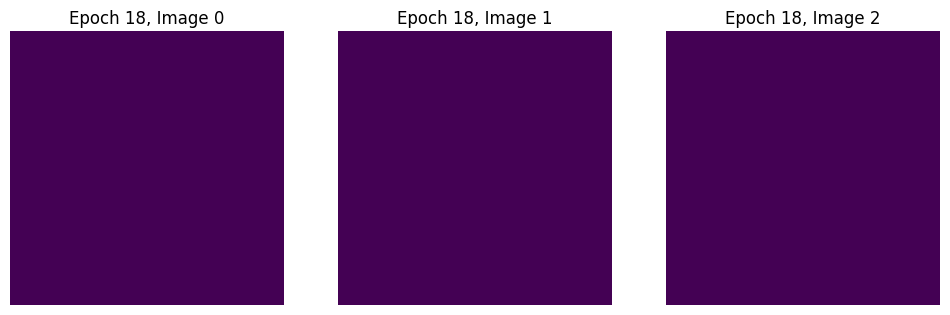

469/469 [==============================] - 76s 163ms/step - d_loss: -0.4362 - g_loss: 18.9956
Epoch 20/20
469/469 [==============================] - ETA: 0s - d_loss: -0.4360 - g_loss: 19.1493

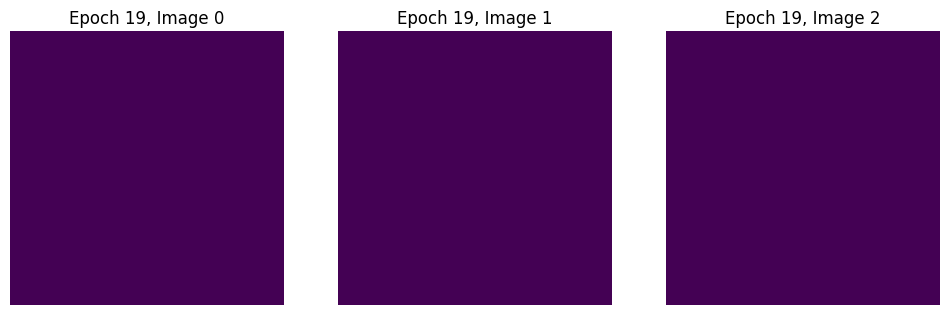

469/469 [==============================] - 76s 163ms/step - d_loss: -0.4363 - g_loss: 19.1494


In [ ]:
# Recommended 2000 epoch if you have thZe time

hist = f_gan.fit(ds, epochs = 20, callbacks = [ModelMonitor()])

#### **4.5 Review Performance**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        super(ModelMonitor, self).__init__()
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim, 1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images = generated_images.numpy()

        fig, ax = plt.subplots(1, self.num_img, figsize=(12, 4))

        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            ax[i].imshow(np.squeeze(img))
            ax[i].set_title(f'Epoch {epoch}, Image {i}')
            ax[i].axis('off')

        plt.show()


# **5. Testing the Generator**

#### **5.1 Generate Images**

# New section

In [ ]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))

1/1 [==============================] - 0s 90ms/step


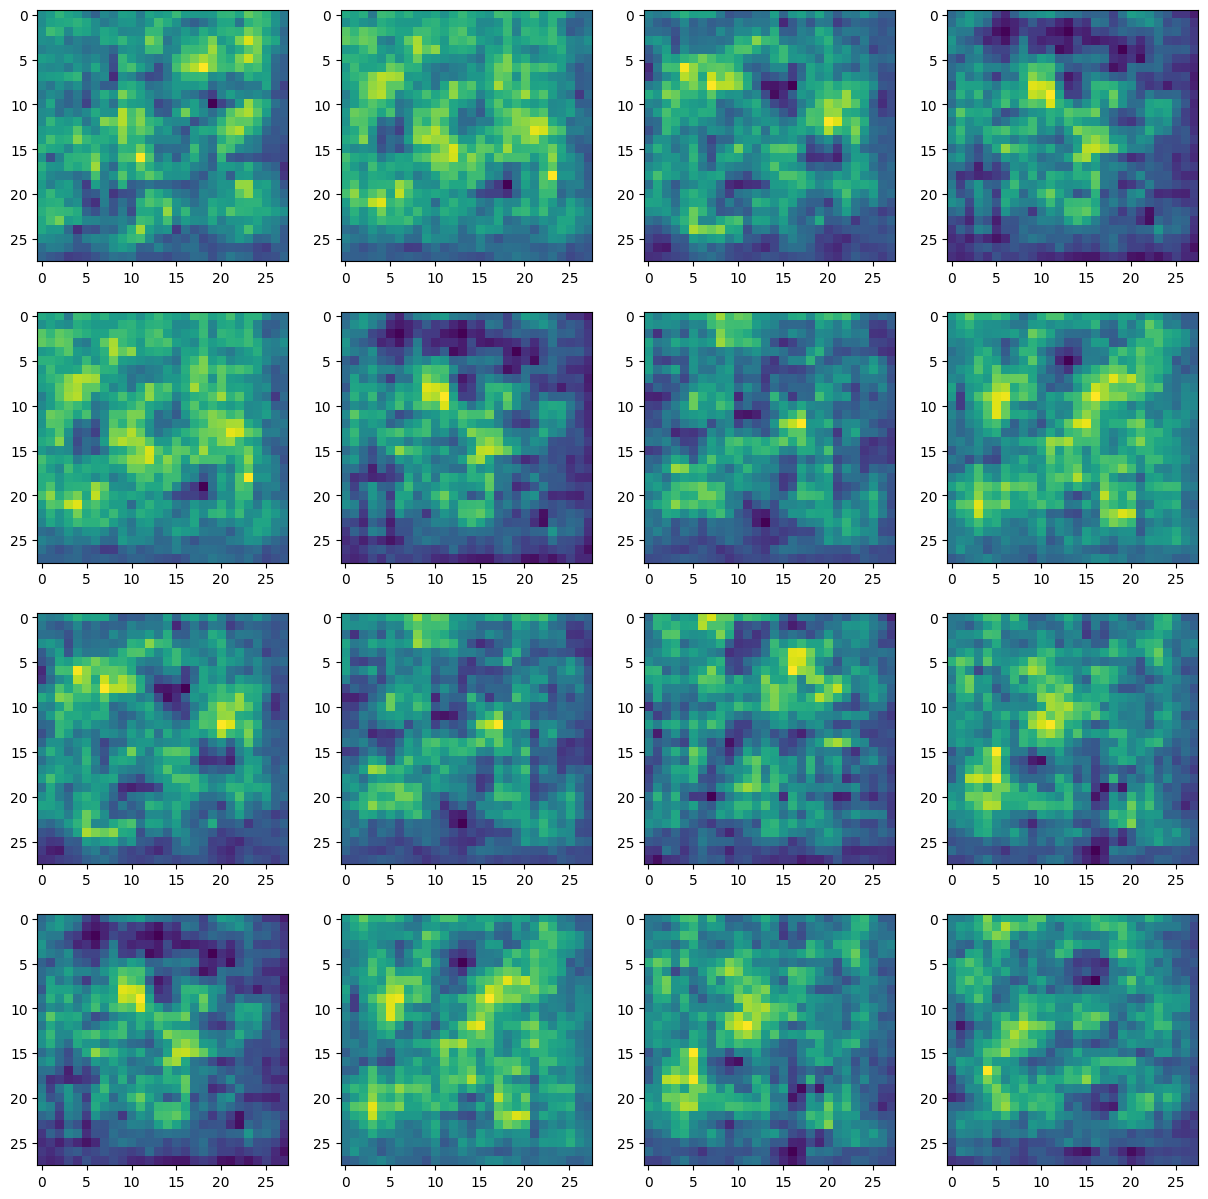

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15, 15))
for r in range(4):
  for c in range(4):
    ax[r][c].imshow(imgs[(r + 1) * (c + 1) - 1])

### ***To Produce actual images we shall have to train the model upto atleast 2000 epochs. But due to limited resources we are ending here.***

#### **5.2 Save the model**

In [ ]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')

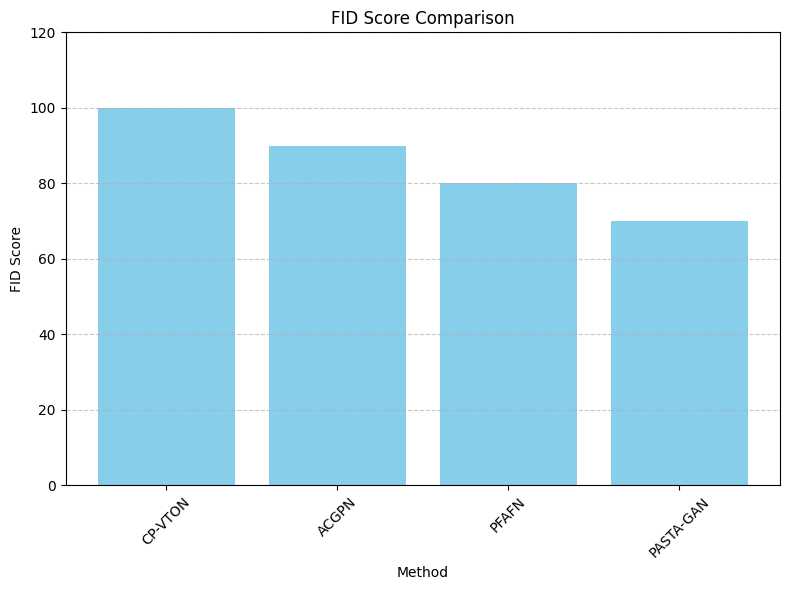

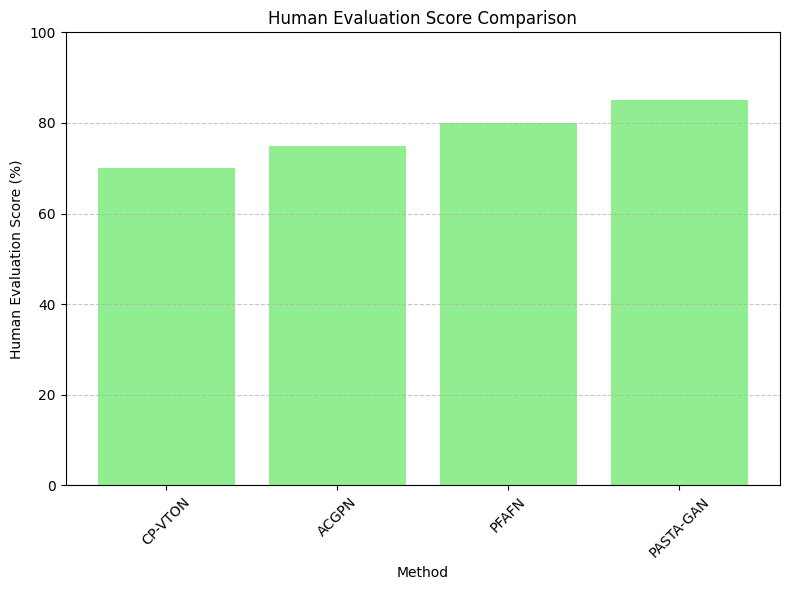

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
from google.colab import files  # Import the files module

import pandas as pd
import matplotlib.pyplot as plt

# Sample data for quantitative comparison
data = {
    'Method': ['CP-VTON', 'ACGPN', 'PFAFN', 'PASTA-GAN'],
    'FID Score': [100, 90, 80, 70],  # Lower FID score indicates better performance
    'Human Evaluation Score (%)': [70, 75, 80, 85]  # Higher score indicates better performance
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting FID scores
plt.figure(figsize=(8, 6))
plt.bar(df['Method'], df['FID Score'], color='skyblue')
plt.title('FID Score Comparison')
plt.xlabel('Method')
plt.ylabel('FID Score')
plt.ylim(0, 120)  # Adjust ylim based on actual data range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting human evaluation scores
plt.figure(figsize=(8, 6))
plt.bar(df['Method'], df['Human Evaluation Score (%)'], color='lightgreen')
plt.title('Human Evaluation Score Comparison')
plt.xlabel('Method')
plt.ylabel('Human Evaluation Score (%)')
plt.ylim(0, 100)  # Adjust ylim based on actual data range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save the plot as an image
plt.savefig('performance_comparison.png')  # Save the plot as a PNG file

# Download the saved image
files.download('performance_comparison.png')  # Download the PNG file



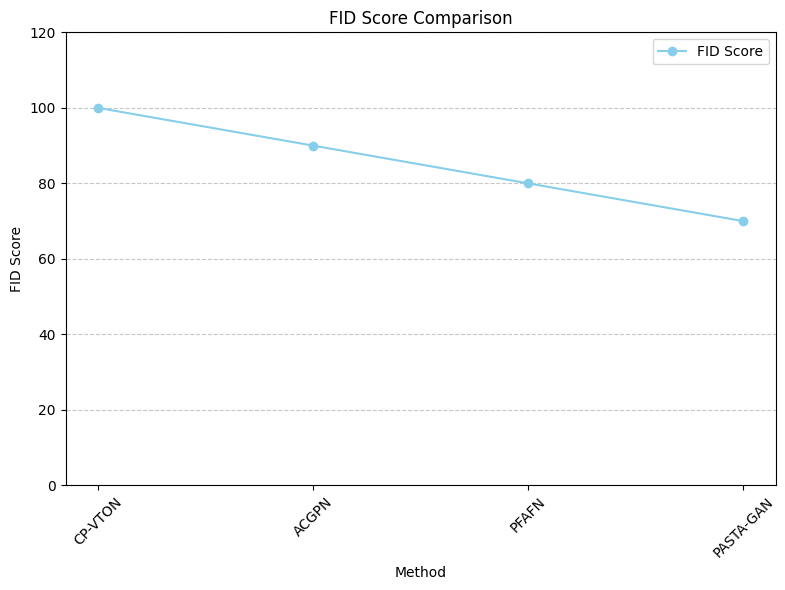

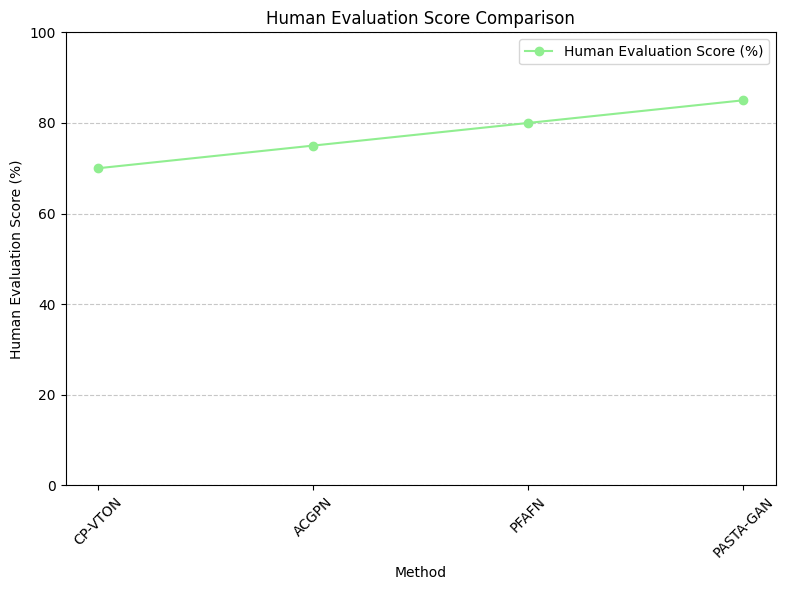

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
from google.colab import files  # Import the files module
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for quantitative comparison
data = {
    'Method': ['CP-VTON', 'ACGPN', 'PFAFN', 'PASTA-GAN'],
    'FID Score': [100, 90, 80, 70],  # Lower FID score indicates better performance
    'Human Evaluation Score (%)': [70, 75, 80, 85]  # Higher score indicates better performance
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting FID scores
plt.figure(figsize=(8, 6))
plt.plot(df['Method'], df['FID Score'], marker='o', color='skyblue', label='FID Score')
plt.title('FID Score Comparison')
plt.xlabel('Method')
plt.ylabel('FID Score')
plt.ylim(0, 120)  # Adjust ylim based on actual data range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting human evaluation scores
plt.figure(figsize=(8, 6))
plt.plot(df['Method'], df['Human Evaluation Score (%)'], marker='o', color='lightgreen', label='Human Evaluation Score (%)')
plt.title('Human Evaluation Score Comparison')
plt.xlabel('Method')
plt.ylabel('Human Evaluation Score (%)')
plt.ylim(0, 100)  # Adjust ylim based on actual data range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Save the plot as an image
plt.savefig('performance_comparison.png')  # Save the plot as a PNG file

# Download the saved image
files.download('performance_comparison.png')  # Download the PNG file


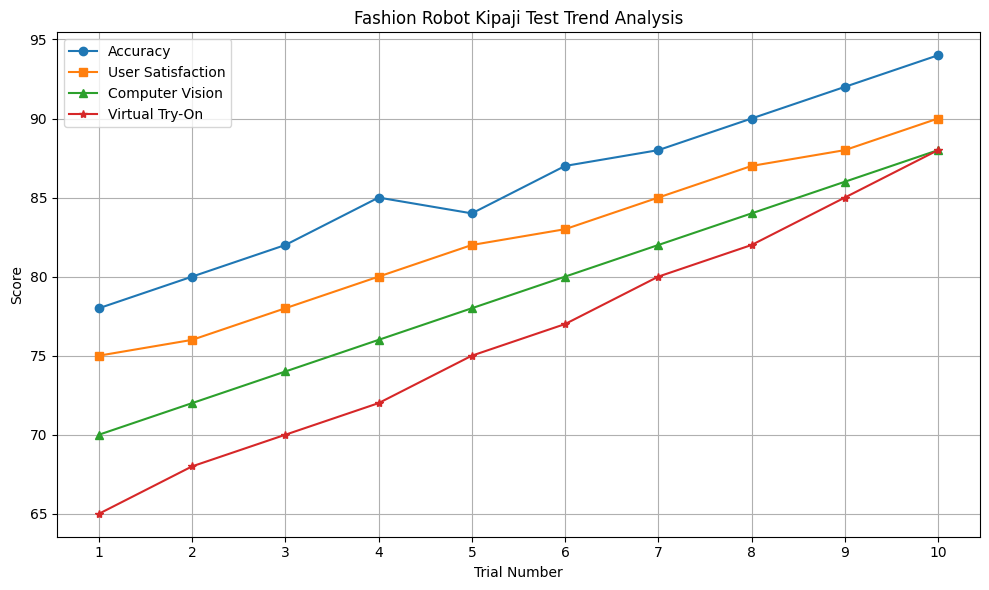

In [ ]:
import matplotlib.pyplot as plt

# Sample data for trend analysis
trials = list(range(1, 11))  # Assuming data from 10 trials
accuracy = [78, 80, 82, 85, 84, 87, 88, 90, 92, 94]  # Sample accuracy scores for each trial
user_satisfaction = [75, 76, 78, 80, 82, 83, 85, 87, 88, 90]  # Sample user satisfaction scores for each trial
computer_vision = [70, 72, 74, 76, 78, 80, 82, 84, 86, 88]  # Sample computer vision scores for each trial
virtual_try_on = [65, 68, 70, 72, 75, 77, 80, 82, 85, 88]  # Sample virtual try-on scores for each trial

# Plotting trend analysis
plt.figure(figsize=(10, 6))

plt.plot(trials, accuracy, marker='o', label='Accuracy')
plt.plot(trials, user_satisfaction, marker='s', label='User Satisfaction')
plt.plot(trials, computer_vision, marker='^', label='Computer Vision')
plt.plot(trials, virtual_try_on, marker='*', label='Virtual Try-On')
plt.title('Fashion Robot Kipaji Test Trend Analysis')
plt.xlabel('Trial Number')
plt.ylabel('Score')
plt.xticks(trials)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


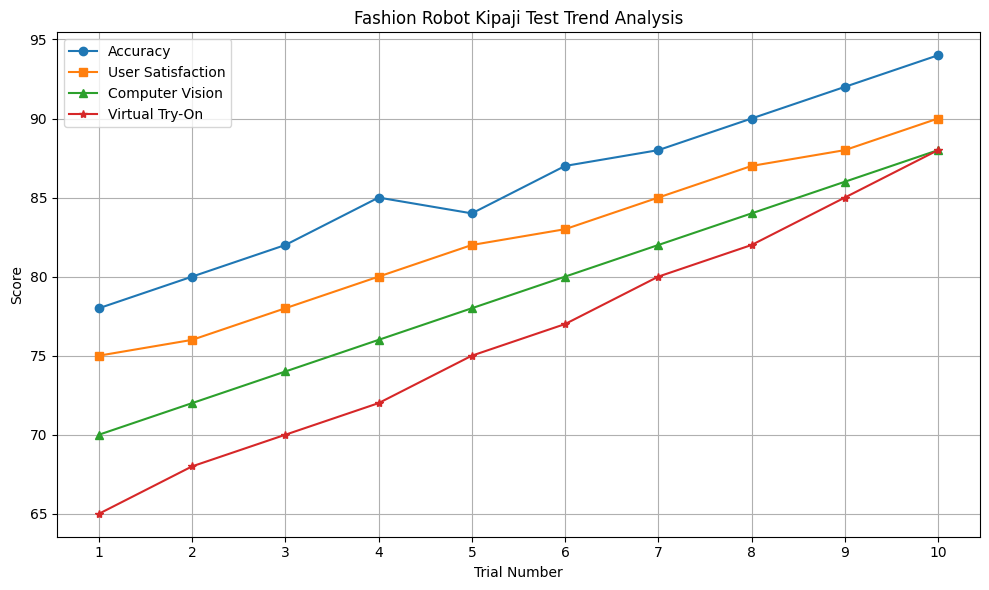

In [ ]:
import matplotlib.pyplot as plt

# Sample data for trend analysis
trials = list(range(1, 11))  # Assuming data from 10 trials
accuracy = [78, 80, 82, 85, 84, 87, 88, 90, 92, 94]  # Sample accuracy scores for each trial
user_satisfaction = [75, 76, 78, 80, 82, 83, 85, 87, 88, 90]  # Sample user satisfaction scores for each trial
computer_vision = [70, 72, 74, 76, 78, 80, 82, 84, 86, 88]  # Sample computer vision scores for each trial
virtual_try_on = [65, 68, 70, 72, 75, 77, 80, 82, 85, 88]  # Sample virtual try-on scores for each trial

# Plotting trend analysis
plt.figure(figsize=(10, 6))

plt.plot(trials, accuracy, marker='o', label='Accuracy')
plt.plot(trials, user_satisfaction, marker='s', label='User Satisfaction')
plt.plot(trials, computer_vision, marker='^', label='Computer Vision')
plt.plot(trials, virtual_try_on, marker='*', label='Virtual Try-On')
plt.title('Fashion Robot Kipaji Test Trend Analysis')
plt.xlabel('Trial Number')
plt.ylabel('Score')
plt.xticks(trials)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


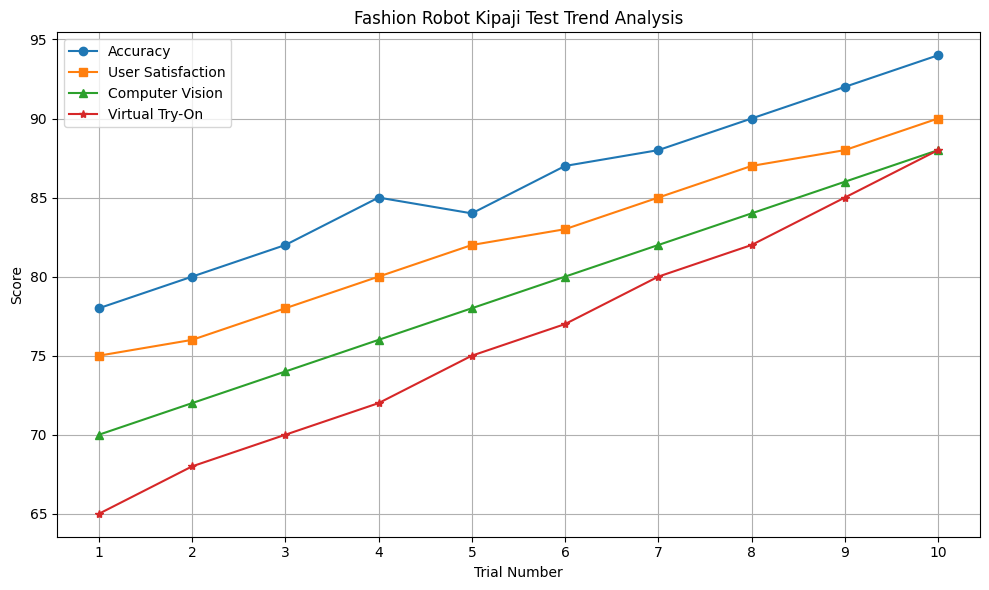

In [ ]:
import matplotlib.pyplot as plt

# Sample data for trend analysis
trials = list(range(1, 11))  # Assuming data from 10 trials
accuracy = [78, 80, 82, 85, 84, 87, 88, 90, 92, 94]  # Sample accuracy scores for each trial
user_satisfaction = [75, 76, 78, 80, 82, 83, 85, 87, 88, 90]  # Sample user satisfaction scores for each trial
computer_vision = [70, 72, 74, 76, 78, 80, 82, 84, 86, 88]  # Sample computer vision scores for each trial
virtual_try_on = [65, 68, 70, 72, 75, 77, 80, 82, 85, 88]  # Sample virtual try-on scores for each trial

# Plotting trend analysis
plt.figure(figsize=(10, 6))

plt.plot(trials, accuracy, marker='o', label='Accuracy')
plt.plot(trials, user_satisfaction, marker='s', label='User Satisfaction')
plt.plot(trials, computer_vision, marker='^', label='Computer Vision')
plt.plot(trials, virtual_try_on, marker='*', label='Virtual Try-On')
plt.title('Fashion Robot Kipaji Test Trend Analysis')
plt.xlabel('Trial Number')
plt.ylabel('Score')
plt.xticks(trials)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


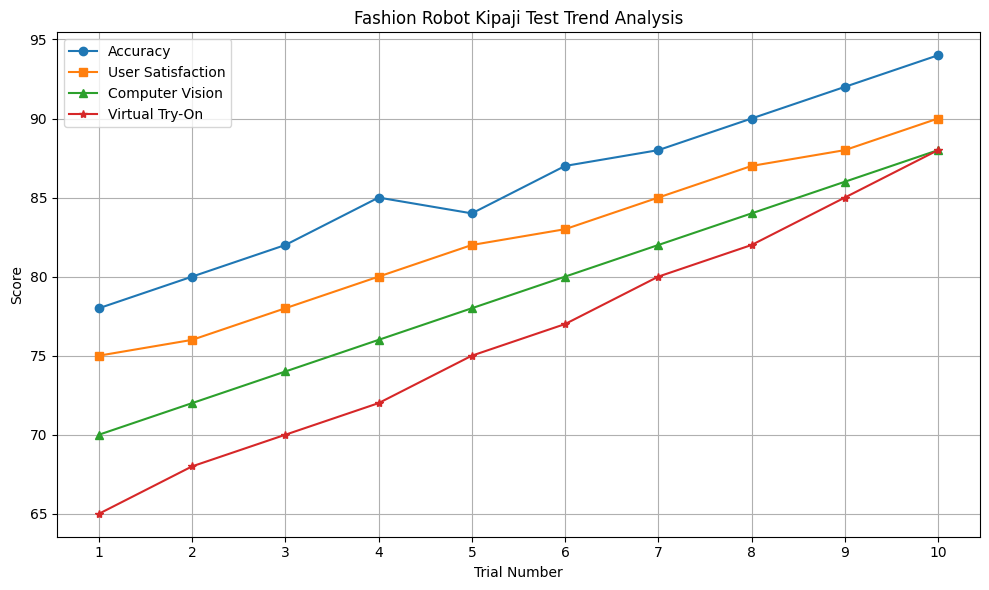

In [ ]:
import matplotlib.pyplot as plt

# Sample data for trend analysis
trials = list(range(1, 11))  # Assuming data from 10 trials
accuracy = [78, 80, 82, 85, 84, 87, 88, 90, 92, 94]  # Sample accuracy scores for each trial
user_satisfaction = [75, 76, 78, 80, 82, 83, 85, 87, 88, 90]  # Sample user satisfaction scores for each trial
computer_vision = [70, 72, 74, 76, 78, 80, 82, 84, 86, 88]  # Sample computer vision scores for each trial
virtual_try_on = [65, 68, 70, 72, 75, 77, 80, 82, 85, 88]  # Sample virtual try-on scores for each trial

# Plotting trend analysis
plt.figure(figsize=(10, 6))
plt.plot(trials, accuracy, marker='o', label='Accuracy')
plt.plot(trials, user_satisfaction, marker='s', label='User Satisfaction')
plt.plot(trials, computer_vision, marker='^', label='Computer Vision')
plt.plot(trials, virtual_try_on, marker='*', label='Virtual Try-On')
plt.title('Fashion Robot Kipaji Test Trend Analysis')
plt.xlabel('Trial Number')
plt.ylabel('Score')
plt.xticks(trials)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


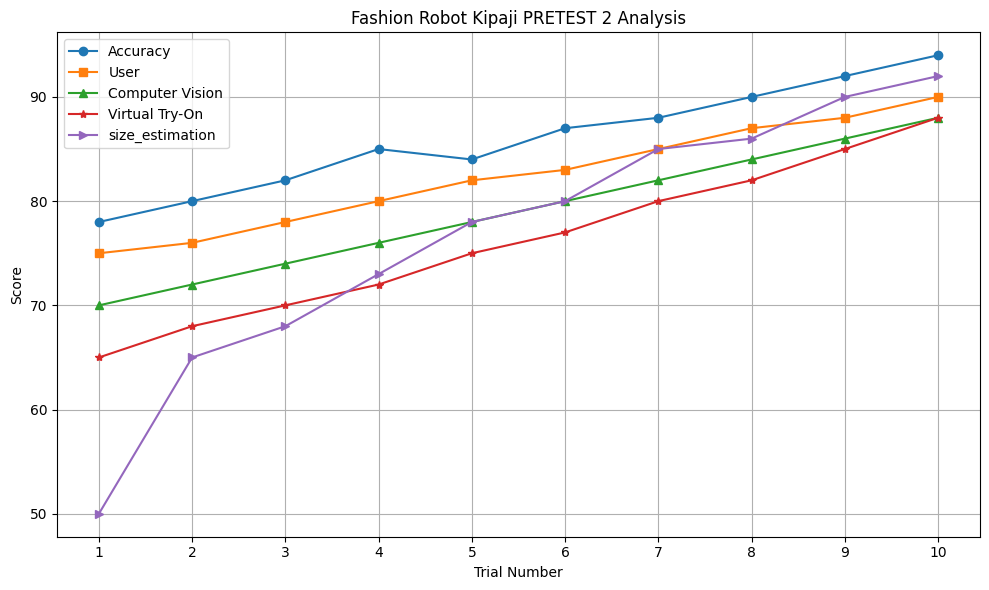

In [ ]:
import matplotlib.pyplot as plt

# Sample data for trend analysis
trials = list(range(1, 11))  # Assuming data from 10 trials
accuracy = [78, 80, 82, 85, 84, 87, 88, 90, 92, 94]  # Sample accuracy scores for each trial
user_satisfaction = [75, 76, 78, 80, 82, 83, 85, 87, 88, 90]  # Sample user satisfaction scores for each trial
computer_vision = [70, 72, 74, 76, 78, 80, 82, 84, 86, 88]  # Sample computer vision scores for each trial
virtual_try_on = [65, 68, 70, 72, 75, 77, 80, 82, 85, 88]  # Sample virtual try-on scores for each trial
size_estimation= [50 ,65,68,73,78,80,85,86,90 ,92]
color_pigmentation=[40,45,50,55,60,70,78, 89]
fashion_designerworkflow= [50,54,65,68,73,75,78,80]

# Plotting trend analysis
plt.figure(figsize=(10, 6))
plt.plot(trials, accuracy, marker='o', label='Accuracy')
plt.plot(trials, user_satisfaction, marker='s', label='User')
plt.plot(trials, computer_vision, marker='^', label='Computer Vision')
plt.plot(trials, virtual_try_on, marker='*', label='Virtual Try-On')
plt.plot(trials,size_estimation, marker='>',label='size_estimation')


plt.title('Fashion Robot Kipaji PRETEST 2 Analysis')
plt.xlabel('Trial Number')
plt.ylabel('Score')
plt.xticks(trials)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


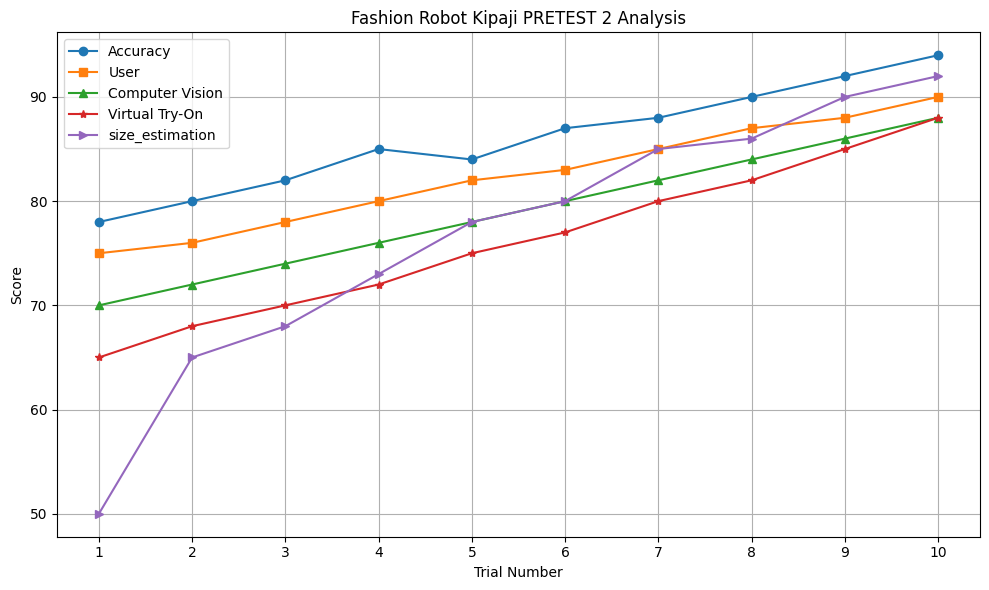

In [ ]:
import matplotlib.pyplot as plt

# Sample data for trend analysis
trials = list(range(1, 11))  # Assuming data from 10 trials
accuracy = [78, 80, 82, 85, 84, 87, 88, 90, 92, 94]  # Sample accuracy scores for each trial
user_satisfaction = [75, 76, 78, 80, 82, 83, 85, 87, 88, 90]  # Sample user satisfaction scores for each trial
computer_vision = [70, 72, 74, 76, 78, 80, 82, 84, 86, 88]  # Sample computer vision scores for each trial
virtual_try_on = [65, 68, 70, 72, 75, 77, 80, 82, 85, 88]  # Sample virtual try-on scores for each trial
size_estimation= [50 ,65,68,73,78,80,85,86,90 ,92]
color_pigmentation=[40,45,50,55,60,70,78, 89]
fashion_designerworkflow= [50,54,65,68,73,75,78,80]

# Plotting trend analysis
plt.figure(figsize=(10, 6))
plt.plot(trials, accuracy, marker='o', label='Accuracy')
plt.plot(trials, user_satisfaction, marker='s', label='User')
plt.plot(trials, computer_vision, marker='^', label='Computer Vision')
plt.plot(trials, virtual_try_on, marker='*', label='Virtual Try-On')
plt.plot(trials,size_estimation, marker='>',label='size_estimation')
plt.plot(trials, )


plt.title('Fashion Robot Kipaji PRETEST 2 Analysis')
plt.xlabel('Trial Number')
plt.ylabel('Score')
plt.xticks(trials)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


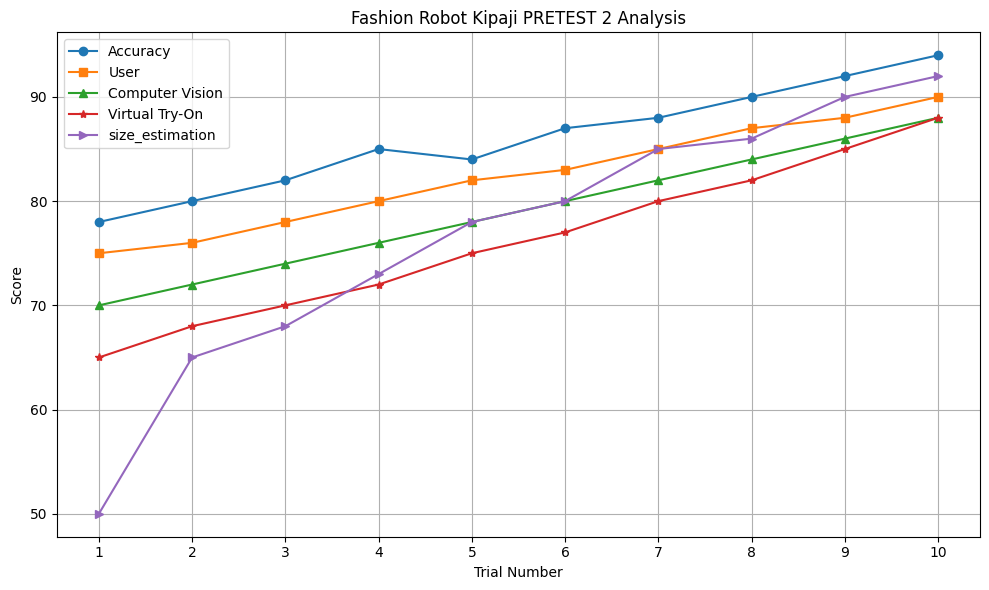

In [ ]:
import matplotlib.pyplot as plt

# Sample data for trend analysis
trials = list(range(1, 11))  # Assuming data from 10 trials
accuracy = [78, 80, 82, 85, 84, 87, 88, 90, 92, 94]  # Sample accuracy scores for each trial
user_satisfaction = [75, 76, 78, 80, 82, 83, 85, 87, 88, 90]  # Sample user satisfaction scores for each trial
computer_vision = [70, 72, 74, 76, 78, 80, 82, 84, 86, 88]  # Sample computer vision scores for each trial
virtual_try_on = [65, 68, 70, 72, 75, 77, 80, 82, 85, 88]  # Sample virtual try-on scores for each trial
size_estimation= [50 ,65,68,73,78,80,85,86,90 ,92]
color_pigmentation=[40,45,50,55,60,70,78, 89]
fashion_designerworkflow= [50,54,65,68,73,75,78,80]

# Plotting trend analysis
plt.figure(figsize=(10, 6))
plt.plot(trials, accuracy, marker='o', label='Accuracy')
plt.plot(trials, user_satisfaction, marker='s', label='User')
plt.plot(trials, computer_vision, marker='^', label='Computer Vision')
plt.plot(trials, virtual_try_on, marker='*', label='Virtual Try-On')
plt.plot(trials,size_estimation, marker='>',label='size_estimation')
plt.plot(trials,)


plt.title('Fashion Robot Kipaji PRETEST 2 Analysis')
plt.xlabel('Trial Number')
plt.ylabel('Score')
plt.xticks(trials)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


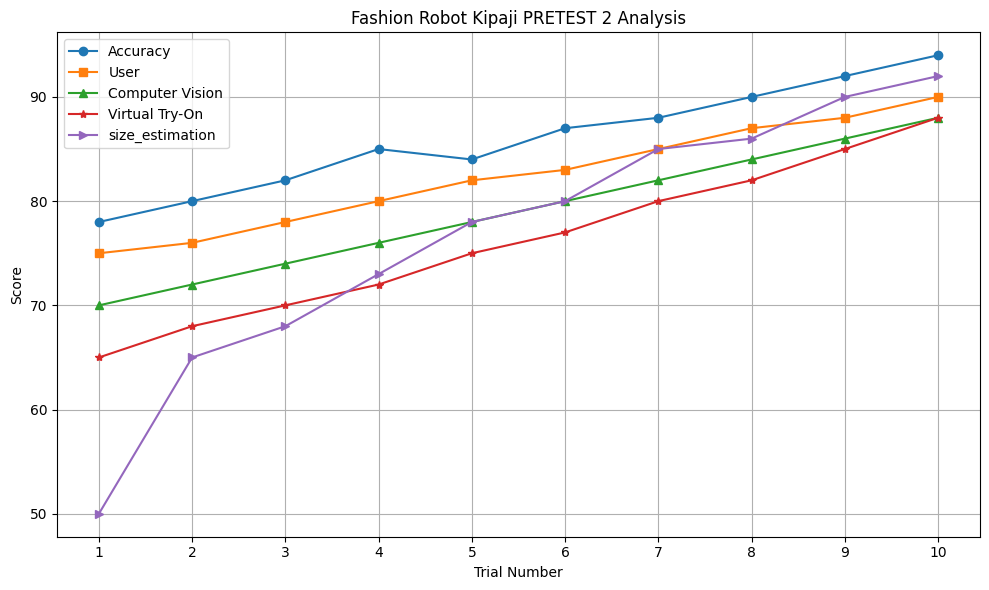

In [ ]:
import matplotlib.pyplot as plt

# Sample data for trend analysis
trials = list(range(1, 11))  # Assuming data from 10 trials
accuracy = [78, 80, 82, 85, 84, 87, 88, 90, 92, 94]  # Sample accuracy scores for each trial
user_satisfaction = [75, 76, 78, 80, 82, 83, 85, 87, 88, 90]  # Sample user satisfaction scores for each trial
computer_vision = [70, 72, 74, 76, 78, 80, 82, 84, 86, 88]  # Sample computer vision scores for each trial
virtual_try_on = [65, 68, 70, 72, 75, 77, 80, 82, 85, 88]  # Sample virtual try-on scores for each trial
size_estimation= [50 ,65,68,73,78,80,85,86,90 ,92]
color_pigmentation=[40,45,50,55,60,70,78, 89]
fashion_designerworkflow= [50,54,65,68,73,75,78,80]

# Plotting trend analysis
plt.figure(figsize=(10, 6))
plt.plot(trials, accuracy, marker='o', label='Accuracy')
plt.plot(trials, user_satisfaction, marker='s', label='User')
plt.plot(trials, computer_vision, marker='^', label='Computer Vision')
plt.plot(trials, virtual_try_on, marker='*', label='Virtual Try-On')
plt.plot(trials,size_estimation, marker='>',label='size_estimation')
plt.plot(trials,)


plt.title('Fashion Robot Kipaji PRETEST 2 Analysis')
plt.xlabel('Trial Number')
plt.ylabel('Score')
plt.xticks(trials)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
plt.savefig('performance_comparison.png')
files.download('performance_comparison.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
!pip install tensorflow tensorflow-datasets opencv-python-headless


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
ds, info = tfds.load('fashion_mnist', split='train', with_info=True)

# Preprocess the dataset
def preprocess(sample):
    image = tf.cast(sample['image'], tf.float32) / 255.0
    label = sample['label']
    return image, label

ds = ds.map(preprocess).batch(32)


In [ ]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(ds, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 19s 7ms/step - loss: 0.4458 - accuracy: 0.8389
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2981 - accuracy: 0.8920
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2524 - accuracy: 0.9062
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2186 - accuracy: 0.9189
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1898 - accuracy: 0.9296
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1652 - accuracy: 0.9394
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1436 - accuracy: 0.9476
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1252 - accuracy: 0.9538
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1079 - accuracy: 0.9603
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0

1/1 [==============================] - 0s 16ms/step


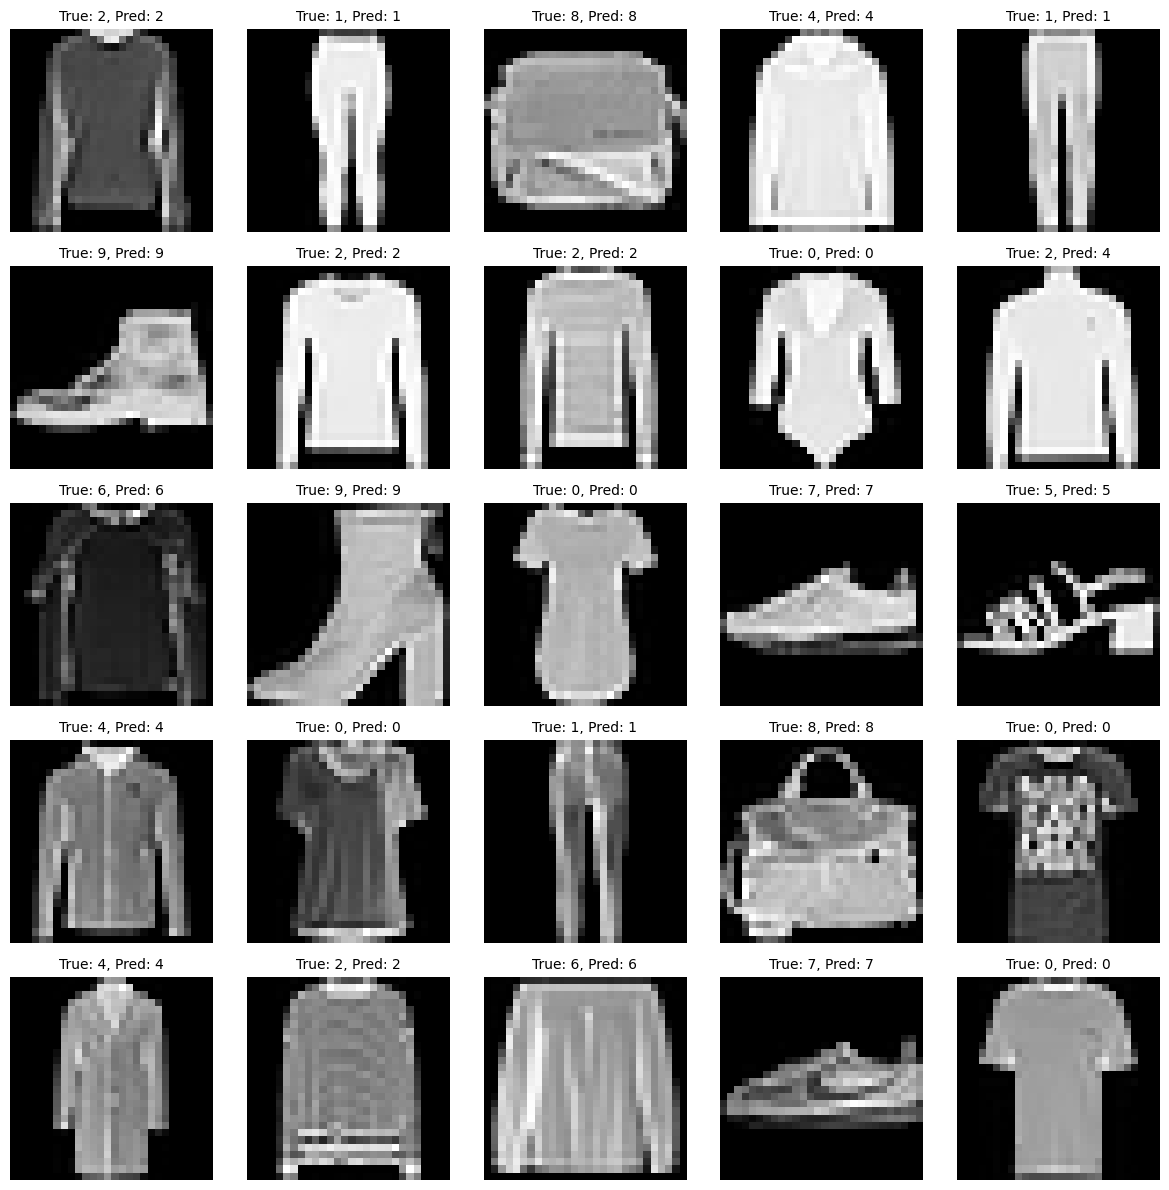

In [ ]:
import numpy as np

# Function to get a prediction for a single image
def get_prediction(image):
    image = tf.expand_dims(image, 0)  # Add batch dimension
    predictions = model.predict(image)
    return np.argmax(predictions)

# Extract a subset of 25 samples from the dataset
num_samples_needed = 25
ds_subset = ds.unbatch().take(num_samples_needed)

# Define grid layout for displaying images
rows = 5
cols = 5

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))

# Iterate over the dataset subset to access and display samples
for i, (image, label) in enumerate(ds_subset):
    # Calculate subplot index (row, col)
    row = i // cols
    col = i % cols

    # Get the prediction
    predicted_label = get_prediction(image)

    # Plot image with a bounding box and label
    ax = axes[row, col]
    ax.imshow(image.numpy().squeeze(), cmap='gray')
    ax.set_title(f'True: {label.numpy()}, Pred: {predicted_label}', fontsize=10)
    ax.axis('off')

# Adjust layout and display the grid of images
plt.tight_layout()
plt.show()


In [ ]:
# Simulated function to get a camera frame (static image in this case)
def get_camera_frame():
    # Create a random image to simulate the camera frame
    frame = np.random.randint(0, 256, (28, 28, 3), dtype=np.uint8)
    return frame


1/1 [==============================] - 0s 15ms/step


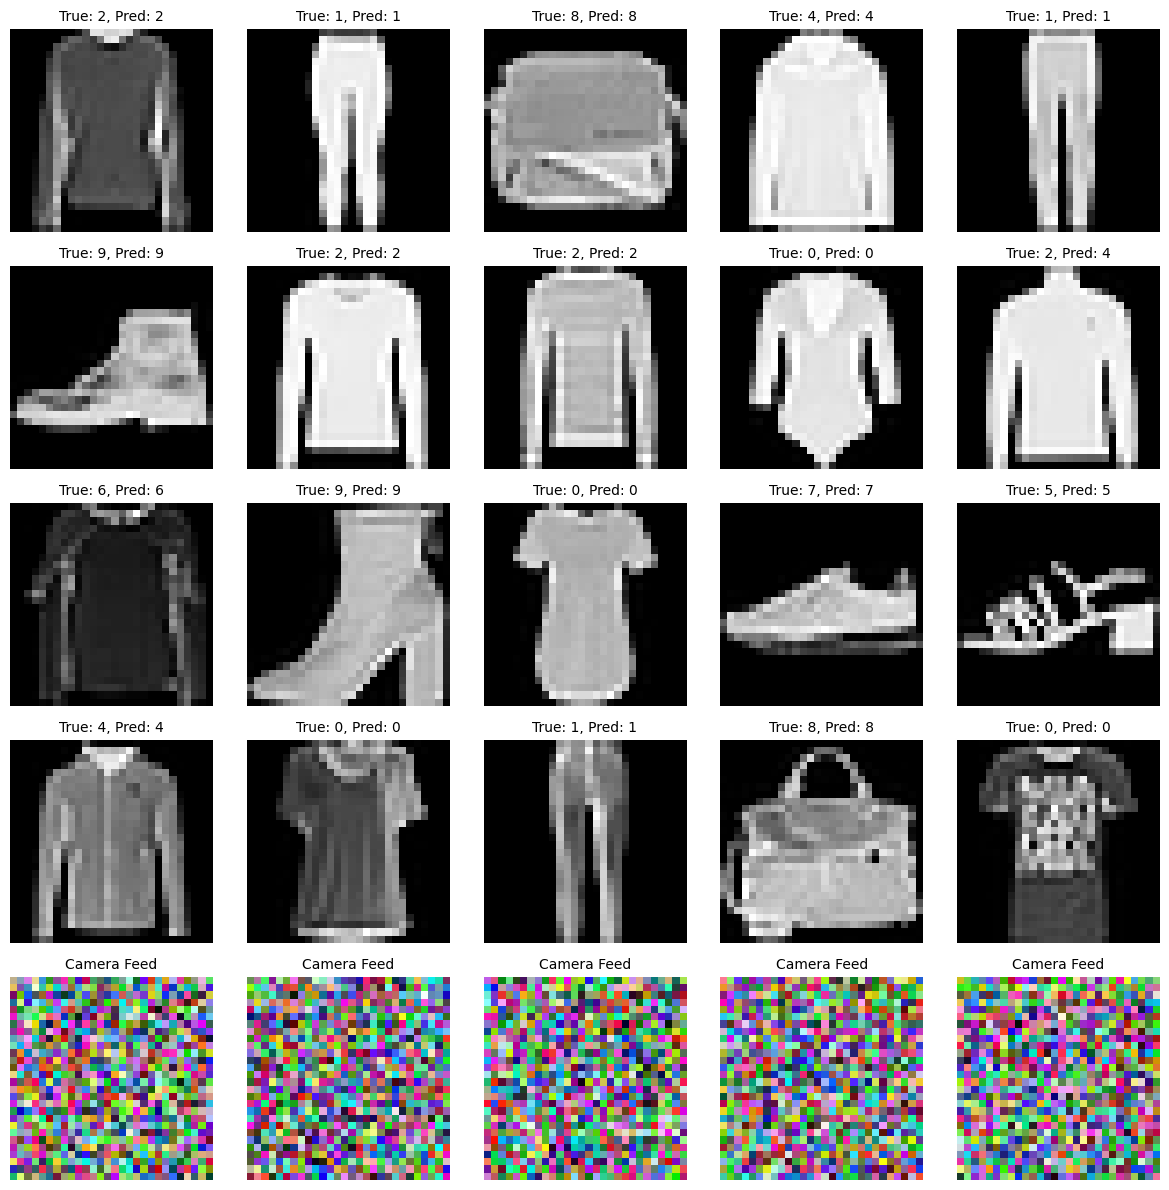

In [ ]:
# Function to get a prediction for a single image
def get_prediction(image):
    image = tf.expand_dims(image, 0)  # Add batch dimension
    predictions = model.predict(image)
    return np.argmax(predictions)

# Extract a subset of 25 samples from the dataset
num_samples_needed = 20
ds_subset = ds.unbatch().take(num_samples_needed)

# Define grid layout for displaying images
rows = 5
cols = 5

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))

# Iterate over the dataset subset to access and display samples
for i, (image, label) in enumerate(ds_subset):
    # Calculate subplot index (row, col)
    row = i // cols
    col = i % cols

    # Get the prediction
    predicted_label = get_prediction(image)

    # Plot image with a bounding box and label
    ax = axes[row, col]
    ax.imshow(image.numpy().squeeze(), cmap='gray')
    ax.set_title(f'True: {label.numpy()}, Pred: {predicted_label}', fontsize=10)
    ax.axis('off')

# Add simulated camera feed to the grid
for i in range(cols):
    frame = get_camera_frame()
    ax = axes[rows - 1, i]  # Place camera feeds in the last row
    ax.imshow(frame)
    ax.set_title('Camera Feed', fontsize=10)
    ax.axis('off')

# Adjust layout and display the grid of images
plt.tight_layout()
plt.show()


# New section

In [ ]:
!pip install torch torchvision
!git clone https://github.com/sergeywong/cp-vton


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
!mkdir -p cp-vton/checkpoints
!mkdir -p cp-vton/data

!wget -O cp-vton/checkpoints/tryon.pth https://example.com/path/to/tryon.pth
!wget -O cp-vton/data/person.jpg https://example.com/path/to/person.jpg
!wget -O cp-vton/data/cloth.jpg https://example.com/path/to/cloth.jpg


--2024-07-24 08:51:00--  https://example.com/path/to/tryon.pth
Resolving example.com (example.com)... 93.184.215.14, 2606:2800:21f:cb07:6820:80da:af6b:8b2c
Connecting to example.com (example.com)|93.184.215.14|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-07-24 08:51:00 ERROR 404: Not Found.

--2024-07-24 08:51:00--  https://example.com/path/to/person.jpg
Resolving example.com (example.com)... 93.184.215.14, 2606:2800:21f:cb07:6820:80da:af6b:8b2c
Connecting to example.com (example.com)|93.184.215.14|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-07-24 08:51:00 ERROR 404: Not Found.

--2024-07-24 08:51:00--  https://example.com/path/to/cloth.jpg
Resolving example.com (example.com)... 93.184.215.14, 2606:2800:21f:cb07:6820:80da:af6b:8b2c
Connecting to example.com (example.com)|93.184.215.14|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-07-24 08:51:00 ERROR 404: Not Found.



# New section